In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.3 MB/s eta 0:00:00


In [ ]:
#Add ta library for using technical indicators
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=522aa47edbf7a0b14d05080bc5122b78a5fbb688bd17b010beca4dab9b41a7ce
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
print(tf.__version__)

NameError: name 'tf' is not defined

In [ ]:
import tensorflow as tf

In [ ]:
#import the libraries

import ta
import math
import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv2D, TimeDistributed, Flatten, Lambda, Reshape
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')
from ta import add_all_ta_features
from ta.utils import dropna
from keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Bidirectional
import optuna
from keras.backend import clear_session
import urllib
import warnings

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DA.csv')
df['date'] = df['date'].astype(str)
for i in range(len(df['date'])):
    df['date'][i] = datetime.datetime.strptime(
        df['date'][i], '%m/%d/%Y').strftime('%m-%d-%Y')

df

<ipython-input-6-1d03dc201d06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = datetime.datetime.strptime(


,date,Tic,open,high,low,close,volume
0,02-04-2007,Fameli,10.00,10.00,9.00,9.26,172898994
1,02-05-2007,Fameli,9.45,9.45,9.45,9.45,10826496
2,02-06-2007,Fameli,9.63,9.63,9.63,9.63,26850133
3,02-07-2007,Fameli,9.83,9.83,9.83,9.83,31086849
4,02-10-2007,Fameli,10.02,10.02,10.02,10.02,40645528
...,...,...,...,...,...,...,...
3320,04-26-2022,Fameli,2822.79,2837.67,2796.68,2819.14,92410241
3321,04-27-2022,Fameli,2807.86,2830.42,2789.26,2822.81,127762145
3322,04-30-2022,Fameli,2822.81,2826.48,2774.54,2807.85,93701480
3323,05-01-2022,Fameli,2789.31,2789.31,2763.20,2778.08,68683753


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Making new dataframe dfi for inicators
dfi = add_all_ta_features(
    df, open="open", high="high ", low="low", close="close", volume='volume ')

In [ ]:
#Showing dfi
dfi

In [ ]:
dfi.columns

In [ ]:
#Feature Selection

dfr= df[['close','open', 'high ', 'low', 'trend_macd', 'momentum_rsi', 'trend_ema_fast','trend_cci', 'trend_sma_fast', 'trend_kst','momentum_ppo_hist', 'trend_macd_signal', 'trend_macd', 'momentum_stoch_rsi', 'momentum_stoch_rsi_d',
'volume_obv','volume ', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_dcl', 'volatility_dch', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw','volatility_dcp',
        'others_dlr', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'trend_stc', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_cci',
        'trend_aroon_up',
       'trend_aroon_down', 'trend_aroon_ind',
        'trend_psar_up_indicator',
       'trend_psar_down_indicator','momentum_rsi', 'momentum_stoch_rsi',
       'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_tsi',
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
       'momentum_ppo_hist', 'momentum_pvo', 'momentum_pvo_signal',
       'momentum_pvo_hist', 'momentum_kama'
        ]].copy()
dfr

In [ ]:

plt.plot(dfr['close'])
plt.show()


In [ ]:
dfr=dfr.dropna()
dfr

In [ ]:
#Data Preparation
dataset= np.array(dfr)


#Get the number of rows
training_data_len= math.ceil(len(dataset)*0.8)

training_data_len

In [ ]:
#Scale the data
scalar= MinMaxScaler(feature_range=(-1,1))
scaled_data= scalar.fit_transform(dataset)
scaled_data

In [ ]:
scaled_data.shape

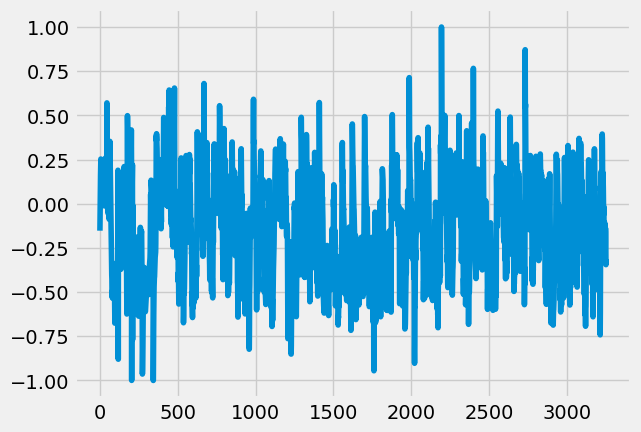

In [ ]:
plt.plot(scaled_data[:,7:8])
plt.show()

In [ ]:
#Create the training data set and scaled trainig dataset
train_data= scaled_data[0:training_data_len, : ]

#Split data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i, 0:85])
  y_train.append(train_data[i, 0])
  if i <= 100:
    print(x_train)
    print(y_train)

[array([[-0.996521  , -0.99643903, -0.99671992, ...,  0.10836935,
        -0.79325128, -0.99619939],
       [-0.9964318 , -0.99634516, -0.99663051, ...,  0.04846453,
        -0.81069315, -0.99619977],
       [-0.99634854, -0.99625716, -0.9965467 , ..., -0.01314426,
        -0.81822194, -0.99619912],
       ...,
       [-0.99264356, -0.99287805, -0.99312692, ..., -0.44616181,
        -0.80354927, -0.99212157],
       [-0.99277439, -0.99288979, -0.99324985, ..., -0.49811487,
        -0.77555911, -0.99222132],
       [-0.99277439, -0.99301298, -0.99324985, ..., -0.5470932 ,
        -0.76241559, -0.99227674]])]
[-0.9927743945953661]


In [ ]:
#Convert to numpy array
x_train, y_train= np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],x_train.shape[2],1 ))
x_train.shape

(2504, 100, 85, 1)

In [ ]:
x_train[1,:,:]

array([[[-0.9964318 ],
        [-0.99634516],
        [-0.99663051],
        ...,
        [ 0.04846453],
        [-0.81069315],
        [-0.99619977]],

       [[-0.99634854],
        [-0.99625716],
        [-0.9965467 ],
        ...,
        [-0.01314426],
        [-0.81822194],
        [-0.99619912]],

       [[-0.9962296 ],
        [-0.99616917],
        [-0.99646288],
        ...,
        [-0.07353109],
        [-0.81282287],
        [-0.99617987]],

       ...,

       [[-0.99277439],
        [-0.99288979],
        [-0.99324985],
        ...,
        [-0.49811487],
        [-0.77555911],
        [-0.99222132]],

       [[-0.99277439],
        [-0.99301298],
        [-0.99324985],
        ...,
        [-0.5470932 ],
        [-0.76241559],
        [-0.99227674]],

       [[-0.99277439],
        [-0.99301298],
        [-0.99324985],
        ...,
        [-0.59305689],
        [-0.74909567],
        [-0.99230753]]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(85, 100))

min_val, max_val = -1, 1

intersection_matrix = x_train[1,:,:]

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(85):
    for j in range(100):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')



In [ ]:
y_train.shape

(2504,)

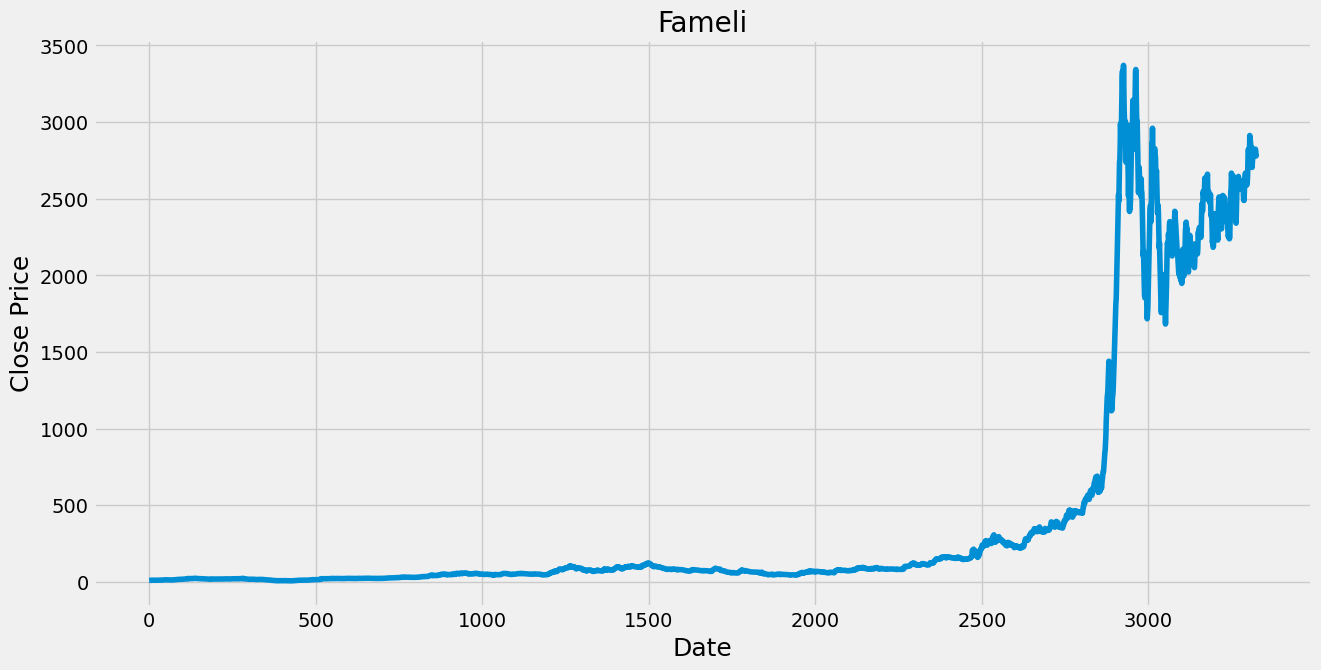

In [ ]:
#visualizing the close price
plt.figure(figsize=(14,7))
plt.title('Fameli')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

Hyper Parameter Optinmization Using Optuna

In [ ]:
#Create the testing data set
#Create a new array containing scaled values
test_data=scaled_data[training_data_len: , :]
#Create the datasets x_test and y_test
x_test=[]
y_test=[]
for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0:85])
  y_test.append(test_data[i,0])
  if i <= 100:
    print(x_test)
    print(y_test)

[array([[-0.80662139, -0.80701518, -0.81295716, ...,  0.24787554,
        -0.39970777, -0.7873124 ],
       [-0.80060303, -0.81139746, -0.80936416, ...,  0.27716511,
        -0.41659692, -0.78734479],
       [-0.80656192, -0.80992497, -0.81397974, ...,  0.30155248,
        -0.43825676, -0.78741508],
       ...,
       [-0.7530746 , -0.75463895, -0.76263278, ...,  0.16156102,
        -0.57249702, -0.72884729],
       [-0.75006542, -0.75688582, -0.76123581, ...,  0.15222137,
        -0.58727612, -0.72985031],
       [-0.73925377, -0.74565731, -0.7533178 , ...,  0.15736241,
        -0.52329472, -0.7294187 ]])]
[-0.7290903468290594]


In [ ]:
#Convert the data into numpy array
x_test= np.array(x_test)
y_test= np.array(y_test)

In [ ]:
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],x_test.shape[2],1 ))
x_test.shape

(550, 100, 85, 1)

In [ ]:
def ReshapeLayer(x):

    shape = x.shape

    # 1 possibility: H,W*channel
    reshape = Reshape((shape[1],shape[2]*shape[3]))(x)

    # 2 possibility: W,H*channel
    # transpose = Permute((2,1,3))(x)
    # reshape = Reshape((shape[1],shape[2]*shape[3]))(transpose)

    return reshape

In [ ]:
opener = urllib.request.build_opener()
opener.addheaders = [("User-agent", "Mozilla/5.0")]
urllib.request.install_opener(opener)

In [ ]:
def objective(trial):
  clear_session()
  model = Sequential()

# 2. Suggest values of the hyperparameters using a trial object.
  model.add(Conv2D(filters=trial.suggest_categorical('filters_1', [64, 128, 256, 512]),
               kernel_size=trial.suggest_categorical('kernel_size_1', [3, 5, 7]),
               strides=trial.suggest_categorical('strides_1', [1, 2]),
               activation=trial.suggest_categorical('activation_1', ['relu']),
               input_shape=(100,85,1)))
  model.add(Conv2D(filters=trial.suggest_categorical('filters_2', [64, 128, 256, 512]),
               kernel_size=trial.suggest_categorical('kernel_size_2', [3, 5]),
               strides=trial.suggest_categorical('strides_2', [1, 2]),
               activation=trial.suggest_categorical('activation_2', ['relu'])))
  model.add(Conv2D(filters=trial.suggest_categorical('filters_3', [64, 128, 256, 512]),
               kernel_size=trial.suggest_categorical('kernel_size_3', [3, 5]),
               strides=trial.suggest_categorical('strides_3', [1, 2]),
               activation=trial.suggest_categorical('activation_3', ['relu'])))
  model.add(Lambda(ReshapeLayer)) # <========== pass from 4D to 3D
  model.add(Bidirectional(LSTM(100, activation=trial.suggest_categorical('activation_4', ['relu', 'tanh']), return_sequences=False)))
  model.add(Dense(1, activation='linear'))

# We compile our model with a sampled learning rate.
  lr = trial.suggest_float('lr', 1e-3, 1e-2, log=True)
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss='mse', optimizer=opt, metrics=['mae'])

  model.fit(
        x_train,
        y_train,
        shuffle=True,
        batch_size=trial.suggest_categorical('batch_size', [16, 32, 64, 128]),
        epochs=trial.suggest_categorical('epochs', [10, 20, 30, 40, 50 ]),
        validation_split=trial.suggest_categorical('val_split', [0.3, 0.2])
    )

    # Evaluate the model accuracy on the validation set.
  score = model.evaluate(x_test, y_test, verbose=0)
  return score[1]

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=6000)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-01-23 13:49:42,522] A new study created in memory with name: no-name-8a4fc35d-7069-49e5-9f0f-6af99a1cb5bb


Epoch 1/20
14/14 [==============================] - 11s 209ms/step - loss: 0.2258 - mae: 0.3899 - val_loss: 0.0306 - val_mae: 0.1692
Epoch 2/20
14/14 [==============================] - 1s 45ms/step - loss: 0.0180 - mae: 0.1142 - val_loss: 0.0058 - val_mae: 0.0681
Epoch 3/20
14/14 [==============================] - 1s 40ms/step - loss: 0.0039 - mae: 0.0532 - val_loss: 0.0019 - val_mae: 0.0363
Epoch 4/20
14/14 [==============================] - 1s 40ms/step - loss: 0.0011 - mae: 0.0275 - val_loss: 0.0016 - val_mae: 0.0311
Epoch 5/20
14/14 [==============================] - 1s 40ms/step - loss: 4.2950e-04 - mae: 0.0168 - val_loss: 0.0018 - val_mae: 0.0312
Epoch 6/20
14/14 [==============================] - 1s 46ms/step - loss: 2.3826e-04 - mae: 0.0124 - val_loss: 0.0021 - val_mae: 0.0329
Epoch 7/20
14/14 [==============================] - 1s 38ms/step - loss: 1.6662e-04 - mae: 0.0101 - val_loss: 0.0024 - val_mae: 0.0357
Epoch 8/20
14/14 [==============================] - 1s 53ms/step - lo

[I 2024-01-23 13:50:10,136] Trial 0 finished with value: 0.9384937882423401 and parameters: {'filters_1': 64, 'kernel_size_1': 7, 'strides_1': 2, 'activation_1': 'relu', 'filters_2': 256, 'kernel_size_2': 3, 'strides_2': 2, 'activation_2': 'relu', 'filters_3': 128, 'kernel_size_3': 3, 'strides_3': 2, 'activation_3': 'relu', 'activation_4': 'tanh', 'lr': 0.001032139641826403, 'batch_size': 128, 'epochs': 20, 'val_split': 0.3}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/10
32/32 [==============================] - 54s 949ms/step - loss: 12220755968.0000 - mae: 62394.2109 - val_loss: 2844740352.0000 - val_mae: 46246.1719
Epoch 2/10
32/32 [==============================] - 19s 596ms/step - loss: 3420892416.0000 - mae: 40750.5039 - val_loss: 1485719424.0000 - val_mae: 28164.2949
Epoch 3/10
32/32 [==============================] - 19s 603ms/step - loss: 1003102400.0000 - mae: 23739.5098 - val_loss: 152884752.0000 - val_mae: 8417.8652
Epoch 4/10
32/32 [==============================] - 19s 600ms/step - loss: 243834256.0000 - mae: 10923.0039 - val_loss: 109907976.0000 - val_mae: 8394.4893
Epoch 5/10
32/32 [==============================] - 19s 604ms/step - loss: 381054976.0000 - mae: 14379.0801 - val_loss: 257440976.0000 - val_mae: 11697.7402
Epoch 6/10
32/32 [==============================] - 20s 613ms/step - loss: 2391099648.0000 - mae: 27115.5566 - val_loss: 484337312.0000 - val_mae: 21052.5898
Epoch 7/10
32/32 [==============================] - 1

[I 2024-01-23 13:54:41,558] Trial 1 finished with value: 948.8131103515625 and parameters: {'filters_1': 256, 'kernel_size_1': 3, 'strides_1': 1, 'activation_1': 'relu', 'filters_2': 512, 'kernel_size_2': 3, 'strides_2': 2, 'activation_2': 'relu', 'filters_3': 256, 'kernel_size_3': 5, 'strides_3': 1, 'activation_3': 'relu', 'activation_4': 'relu', 'lr': 0.004830149713786448, 'batch_size': 64, 'epochs': 10, 'val_split': 0.2}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/40
14/14 [==============================] - 16s 562ms/step - loss: 3.2387 - mae: 1.0686 - val_loss: 0.0443 - val_mae: 0.2050
Epoch 2/40
14/14 [==============================] - 3s 188ms/step - loss: 0.0231 - mae: 0.1309 - val_loss: 0.0045 - val_mae: 0.0482
Epoch 3/40
14/14 [==============================] - 3s 184ms/step - loss: 0.0023 - mae: 0.0418 - val_loss: 0.0149 - val_mae: 0.1125
Epoch 4/40
14/14 [==============================] - 3s 184ms/step - loss: 0.0020 - mae: 0.0393 - val_loss: 0.0064 - val_mae: 0.0637
Epoch 5/40
14/14 [==============================] - 3s 186ms/step - loss: 3.7090e-04 - mae: 0.0161 - val_loss: 0.0039 - val_mae: 0.0428
Epoch 6/40
14/14 [==============================] - 3s 186ms/step - loss: 3.7888e-04 - mae: 0.0165 - val_loss: 0.0051 - val_mae: 0.0529
Epoch 7/40
14/14 [==============================] - 3s 190ms/step - loss: 2.8932e-04 - mae: 0.0143 - val_loss: 0.0056 - val_mae: 0.0572
Epoch 8/40
14/14 [==============================] - 3s 184ms/st

[I 2024-01-23 13:57:09,080] Trial 2 finished with value: 1.1845535039901733 and parameters: {'filters_1': 512, 'kernel_size_1': 5, 'strides_1': 2, 'activation_1': 'relu', 'filters_2': 128, 'kernel_size_2': 5, 'strides_2': 2, 'activation_2': 'relu', 'filters_3': 128, 'kernel_size_3': 3, 'strides_3': 2, 'activation_3': 'relu', 'activation_4': 'tanh', 'lr': 0.002937297693515366, 'batch_size': 128, 'epochs': 40, 'val_split': 0.3}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/50
126/126 [==============================] - 29s 179ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
126/126 [==============================] - 19s 149ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
126/126 [==============================] - 20s 157ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
126/126 [==============================] - 20s 156ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
126/126 [==============================] - 19s 149ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
126/126 [==============================] - 19s 153ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
126/126 [==============================] - 20s 160ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
126/126 [==============================] - 19s 147ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
126/1

[W 2024-01-23 14:13:35,949] Trial 3 failed with parameters: {'filters_1': 64, 'kernel_size_1': 5, 'strides_1': 1, 'activation_1': 'relu', 'filters_2': 512, 'kernel_size_2': 3, 'strides_2': 2, 'activation_2': 'relu', 'filters_3': 128, 'kernel_size_3': 5, 'strides_3': 1, 'activation_3': 'relu', 'activation_4': 'relu', 'lr': 0.00853621615462242, 'batch_size': 16, 'epochs': 50, 'val_split': 0.2} because of the following error: The value nan is not acceptable.
[W 2024-01-23 14:13:35,950] Trial 3 failed with value nan.


Epoch 1/40
126/126 [==============================] - 16s 84ms/step - loss: 119719136.0000 - mae: 5509.4985 - val_loss: 491546.7812 - val_mae: 587.6531
Epoch 2/40
126/126 [==============================] - 10s 78ms/step - loss: 210476.0938 - mae: 362.7296 - val_loss: 220228.5625 - val_mae: 368.0158
Epoch 3/40
126/126 [==============================] - 11s 85ms/step - loss: 1481587.2500 - mae: 653.8198 - val_loss: 1101119.7500 - val_mae: 884.6882
Epoch 4/40
126/126 [==============================] - 10s 80ms/step - loss: 502945.9688 - mae: 510.9092 - val_loss: 283224.3750 - val_mae: 417.8326
Epoch 5/40
126/126 [==============================] - 9s 72ms/step - loss: 168728.6250 - mae: 319.8628 - val_loss: 142723.3750 - val_mae: 288.2863
Epoch 6/40
126/126 [==============================] - 11s 86ms/step - loss: 131901.7031 - mae: 281.2369 - val_loss: 84423.3359 - val_mae: 209.8316
Epoch 7/40
126/126 [==============================] - 10s 83ms/step - loss: 127800.1406 - mae: 273.7832 - va

[I 2024-01-23 14:21:02,871] Trial 4 finished with value: 82.6575927734375 and parameters: {'filters_1': 256, 'kernel_size_1': 3, 'strides_1': 2, 'activation_1': 'relu', 'filters_2': 128, 'kernel_size_2': 5, 'strides_2': 1, 'activation_2': 'relu', 'filters_3': 128, 'kernel_size_3': 3, 'strides_3': 2, 'activation_3': 'relu', 'activation_4': 'relu', 'lr': 0.005711447774056437, 'batch_size': 16, 'epochs': 40, 'val_split': 0.2}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/20
16/16 [==============================] - 93s 3s/step - loss: 3.0832 - mae: 0.9373 - val_loss: 0.0076 - val_mae: 0.0705
Epoch 2/20
16/16 [==============================] - 15s 970ms/step - loss: 0.0160 - mae: 0.1013 - val_loss: 0.0156 - val_mae: 0.1107
Epoch 3/20
16/16 [==============================] - 16s 991ms/step - loss: 0.0022 - mae: 0.0379 - val_loss: 0.0120 - val_mae: 0.0966
Epoch 4/20
16/16 [==============================] - 16s 991ms/step - loss: 8.2134e-04 - mae: 0.0226 - val_loss: 0.0098 - val_mae: 0.0868
Epoch 5/20
16/16 [==============================] - 16s 994ms/step - loss: 5.3137e-04 - mae: 0.0179 - val_loss: 0.0078 - val_mae: 0.0742
Epoch 6/20
16/16 [==============================] - 16s 979ms/step - loss: 4.3432e-04 - mae: 0.0165 - val_loss: 0.0075 - val_mae: 0.0730
Epoch 7/20
16/16 [==============================] - 16s 1000ms/step - loss: 3.9762e-04 - mae: 0.0161 - val_loss: 0.0068 - val_mae: 0.0679
Epoch 8/20
16/16 [==============================] - 16s

[I 2024-01-23 14:27:43,596] Trial 5 finished with value: 1.0916175842285156 and parameters: {'filters_1': 128, 'kernel_size_1': 5, 'strides_1': 1, 'activation_1': 'relu', 'filters_2': 256, 'kernel_size_2': 5, 'strides_2': 1, 'activation_2': 'relu', 'filters_3': 128, 'kernel_size_3': 3, 'strides_3': 1, 'activation_3': 'relu', 'activation_4': 'tanh', 'lr': 0.0015935289634447225, 'batch_size': 128, 'epochs': 20, 'val_split': 0.2}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/50
16/16 [==============================] - 22s 748ms/step - loss: 1542909824.0000 - mae: 27050.7871 - val_loss: 5194614272.0000 - val_mae: 66722.6562
Epoch 2/50
16/16 [==============================] - 5s 296ms/step - loss: 7151707136.0000 - mae: 66761.7188 - val_loss: 8585558016.0000 - val_mae: 66500.8672
Epoch 3/50
16/16 [==============================] - 5s 289ms/step - loss: 26093301760.0000 - mae: 126807.3828 - val_loss: 11676094464.0000 - val_mae: 97527.3906
Epoch 4/50
16/16 [==============================] - 5s 316ms/step - loss: 19038720000.0000 - mae: 108258.6328 - val_loss: 15221498880.0000 - val_mae: 99445.9688
Epoch 5/50
16/16 [==============================] - 5s 283ms/step - loss: 29757622272.0000 - mae: 134853.1406 - val_loss: 98532524032.0000 - val_mae: 303429.5312
Epoch 6/50
16/16 [==============================] - 5s 283ms/step - loss: 37281079296.0000 - mae: 144356.0000 - val_loss: 3175649280.0000 - val_mae: 48161.7695
Epoch 7/50
16/16 [=====================

[I 2024-01-23 14:32:10,351] Trial 6 finished with value: 5654.78759765625 and parameters: {'filters_1': 256, 'kernel_size_1': 7, 'strides_1': 1, 'activation_1': 'relu', 'filters_2': 128, 'kernel_size_2': 3, 'strides_2': 2, 'activation_2': 'relu', 'filters_3': 64, 'kernel_size_3': 3, 'strides_3': 1, 'activation_3': 'relu', 'activation_4': 'relu', 'lr': 0.003078980556271749, 'batch_size': 128, 'epochs': 50, 'val_split': 0.2}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/10
126/126 [==============================] - 16s 91ms/step - loss: 5573742.0000 - mae: 1333.1296 - val_loss: 2251.1189 - val_mae: 36.0680
Epoch 2/10
126/126 [==============================] - 10s 79ms/step - loss: 1752.1936 - mae: 32.4855 - val_loss: 1359.8635 - val_mae: 29.0183
Epoch 3/10
126/126 [==============================] - 9s 75ms/step - loss: 1145.0260 - mae: 27.3444 - val_loss: 1196.1345 - val_mae: 28.1188
Epoch 4/10
126/126 [==============================] - 10s 82ms/step - loss: 916.7802 - mae: 24.5467 - val_loss: 849.5089 - val_mae: 24.5068
Epoch 5/10
126/126 [==============================] - 10s 82ms/step - loss: 672.4484 - mae: 20.8926 - val_loss: 542.6434 - val_mae: 19.2615
Epoch 6/10
126/126 [==============================] - 9s 71ms/step - loss: 524.4044 - mae: 18.3995 - val_loss: 515.0635 - val_mae: 16.9538
Epoch 7/10
126/126 [==============================] - 10s 82ms/step - loss: 431.5362 - mae: 16.7361 - val_loss: 406.6615 - val_mae: 16.1770
Epoch 8/10


[I 2024-01-23 14:34:36,215] Trial 7 finished with value: 34.904727935791016 and parameters: {'filters_1': 128, 'kernel_size_1': 5, 'strides_1': 2, 'activation_1': 'relu', 'filters_2': 256, 'kernel_size_2': 5, 'strides_2': 2, 'activation_2': 'relu', 'filters_3': 512, 'kernel_size_3': 3, 'strides_3': 1, 'activation_3': 'relu', 'activation_4': 'relu', 'lr': 0.002742672977590187, 'batch_size': 16, 'epochs': 10, 'val_split': 0.2}. Best is trial 0 with value: 0.9384937882423401.


Epoch 1/30
32/32 [==============================] - 62s 1s/step - loss: 399222.6562 - mae: 458.2253 - val_loss: 934158.1250 - val_mae: 748.1942
Epoch 2/30
32/32 [==============================] - 29s 916ms/step - loss: 157866320.0000 - mae: 5286.5391 - val_loss: 2273686016.0000 - val_mae: 33060.1133
Epoch 3/30
32/32 [==============================] - 32s 995ms/step - loss: 1834749824.0000 - mae: 27815.9258 - val_loss: 127895576.0000 - val_mae: 7939.7529
Epoch 4/30
32/32 [==============================] - 32s 997ms/step - loss: 130653896.0000 - mae: 8299.8447 - val_loss: 83483536.0000 - val_mae: 7759.3740
Epoch 5/30
32/32 [==============================] - 32s 1s/step - loss: 69488960.0000 - mae: 6109.8521 - val_loss: 13032215.0000 - val_mae: 3186.7136
Epoch 6/30
32/32 [==============================] - 30s 925ms/step - loss: 21408662.0000 - mae: 3111.9797 - val_loss: 13203900.0000 - val_mae: 2738.5195
Epoch 7/30
32/32 [==============================] - 32s 1s/step - loss: 62261308.0000

In [ ]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [ ]:
!pip install optuna-dashboard
!optuna-dashboard sqlite:///db.sqlite3

Model Creation using Optimum Hyper parameters

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(100,85,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.2))
model.add(Lambda(ReshapeLayer)) # <========== pass from 4D to 3D
model.add(LSTM(100, activation='tanh', return_sequences=False))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

In [ ]:
#Compile the model
optimizer = keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


In [ ]:
#Train the model
history= model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.05)

In [ ]:
mae = history.history['mae']
mae

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
training_data_len

In [ ]:
#Convert the data into numpy array
x_test= np.array(x_test)
y_test= np.array(y_test)


In [ ]:
x_test.shape

In [ ]:
#Get the predicted values
predicts = model.predict(x_test)

In [ ]:
predicts

In [ ]:
scaled_data.shape

In [ ]:
scaled_data[2704:3254, 0:1]

In [ ]:
data1 = scalar.inverse_transform(scaled_data)

In [ ]:
#double inverse transform


#2
scaled_data_dup=scaled_data
for i in range(len(predicts)):
  scaled_data_dup[2704+i:2705+i, 0:1]=predicts[i]

data2 = scalar.inverse_transform(scaled_data_dup)


In [ ]:
scaled_data_dup[2704:3254, 0:1]

In [ ]:
data2[2704:3254, 0:1]

In [ ]:
data1[2704:3254, 0:1]

In [ ]:
data2.shape

In [ ]:
#Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
#Visualizing
plt.figure(figsize=(14,7))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(data1[2734:3292, 0:1])
plt.plot(data2[2734:3292, 0:1])
plt.legend(['Real', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Get the root mean square error
from scipy.sparse.linalg.isolve.lsqr import sqrt
from numpy.core.fromnumeric import mean
rmse=np.sqrt(np.mean((data2[2734:, 0:1]-data1[2734:, 0:1])**2))
rmse

In [ ]:
#Vizualisation
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer('conv2d_18').output)
intermediate_output = intermediate_layer_model(x_train[None,1])

for i in range(64):
  plt.plot(intermediate_output[0,:,:,i])
  plt.show()

In [ ]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer('max_pooling2d_18').output)
intermediate_output = intermediate_layer_model(x_train[None,1])

for i in range(64):
  plt.plot(intermediate_output[0,:,:,i])
  plt.show()

In [ ]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer('conv2d_19').output)
intermediate_output = intermediate_layer_model(x_train[None,1])

for i in range(128):
  plt.plot(intermediate_output[0,:,:,i])
  plt.show()

In [ ]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer('max_pooling2d_19').output)
intermediate_output = intermediate_layer_model(x_train[None,1])

for i in range(128):
  plt.plot(intermediate_output[0,:,:,i])
  plt.show()

In [ ]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer('lambda_3').output)
intermediate_output = intermediate_layer_model(x_train[None,1])

plt.plot(intermediate_output[0,:,:,1])
plt.show()